<h1>Оглавление<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Выявление-и-заполнение-пропусков" data-toc-modified-id="Выявление-и-заполнение-пропусков-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Выявление и заполнение пропусков</a></span></li><li><span><a href="#Предобработка-данных" data-toc-modified-id="Предобработка-данных-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Предобработка данных</a></span></li><li><span><a href="#Первичный-анализ-характеристик" data-toc-modified-id="Первичный-анализ-характеристик-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Первичный анализ характеристик</a></span></li><li><span><a href="#Анализ-длительности-продаж" data-toc-modified-id="Анализ-длительности-продаж-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Анализ длительности продаж</a></span></li><li><span><a href="#Выявление-и-устранение-выбивающихся-наблюдений" data-toc-modified-id="Выявление-и-устранение-выбивающихся-наблюдений-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Выявление и устранение выбивающихся наблюдений</a></span></li><li><span><a href="#Оценка-влияния-факторов-на-стоимость-квартиры" data-toc-modified-id="Оценка-влияния-факторов-на-стоимость-квартиры-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Оценка влияния факторов на стоимость квартиры</a></span></li><li><span><a href="#Выявление-локаций-с-наибольшим-числом-продаж" data-toc-modified-id="Выявление-локаций-с-наибольшим-числом-продаж-7"><span class="toc-item-num">7&nbsp;&nbsp;</span>Выявление локаций с наибольшим числом продаж</a></span></li><li><span><a href="#Анализ-квартир-в-Санкт-Петербурге" data-toc-modified-id="Анализ-квартир-в-Санкт-Петербурге-8"><span class="toc-item-num">8&nbsp;&nbsp;</span>Анализ квартир в Санкт-Петербурге</a></span></li><li><span><a href="#Анализ-квартир-в-центре-Санкт-Петербурга" data-toc-modified-id="Анализ-квартир-в-центре-Санкт-Петербурга-9"><span class="toc-item-num">9&nbsp;&nbsp;</span>Анализ квартир в центре Санкт-Петербурга</a></span></li><li><span><a href="#Общий-вывод-по-проекту" data-toc-modified-id="Общий-вывод-по-проекту-10"><span class="toc-item-num">10&nbsp;&nbsp;</span>Общий вывод по проекту</a></span></li></ul></div>

In [1]:
# Импорт основных библиотек для работы
import pandas as pd
import numpy as np
import datetime
import matplotlib.pyplot as plt

# Исследование объявлений о продаже квартир

# Описание проекта <a class="tocSkip">

Данное исследование посвящено анализу объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктах за несколько лет. **Цель исследования** — научиться определять рыночную стоимость объектов недвижимости, а именно установить основные параметры реальных продаж. Результаты данного исследования могут ыть использованы для создания автоматизированной системы, основной задачей которой будет отследивание аномалии и мошеннической деятельности.

**Источник данных** — сервис Яндекс Недвижимость. По каждой квартире на продажу доступны два вида данных:
* первая группа состоит из данных, которые были вписаны самими пользователем
* вторая группа данных рассчитывалась автоматически на основе картографических данных.

Исходный датафрейм состоит из 22 столбцов, которые содержат различную информацию о продаваемых квартирах. А именно:
* total_images — число фотографий квартиры в объявлении
* last_price — цена на момент снятия с публикации
* total_area — площадь квартиры в квадратных метрах (м²)
* first_day_exposition — дата публикации
* rooms — число комнат
* ceiling_height — высота потолков (м)
* floors_total — всего этажей в доме
* living_area — жилая площадь в квадратных метрах (м²)
* floor — этаж
* is_apartment — апартаменты (булев тип)
* studio — квартира-студия (булев тип)
* open_plan — свободная планировка (булев тип)
* kitchen_area — площадь кухни в квадратных метрах (м²)
* balcony — число балконов
* locality_name — название населённого пункта
* airports_nearest — расстояние до ближайшего аэропорта в метрах (м)
* cityCenters_nearest — расстояние до центра города (м)
* parks_around3000 — число парков в радиусе 3 км
* parks_nearest — расстояние до ближайшего парка (м)
* ponds_around3000 — число водоёмов в радиусе 3 км
* ponds_nearest — расстояние до ближайшего водоёма (м)
* days_exposition — сколько дней было размещено объявление (от публикации до снятия)

**Ход исследования**

Исследование будет состоять из 6 основных этапов:
1. Описание проекта
2. Обзор данных
3. Предобработка данных
    * Выявление и заполнение пропусков
    * Предобработка данных 
4. Исследовательский анализ данных
5. Итоговые выводы

# Обзор данных

Начнем нашу работу с загрузки данных в систему, сохранив их в переменной `data`.

In [2]:
data = pd.read_csv('/datasets/real_estate_data.csv', sep='\t')

Выведем несколько первых строк имеющихся данных, а потом просмотрим основную информацию по ним.

In [3]:
data.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.0,2019-03-07T00:00:00,3,2.70,16.0,51.0,8,NaN,...,25.0,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.4,2018-12-04T00:00:00,1,NaN,11.0,18.6,1,NaN,...,11.0,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.0,2015-08-20T00:00:00,2,NaN,5.0,34.3,4,NaN,...,8.3,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.0,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,...,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.0,2018-06-19T00:00:00,2,3.03,14.0,32.0,13,NaN,...,41.0,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          2775 non-null   object 
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               12180 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

Прежде всего рассмотрим, какие характеристики предоставлены в исходных данных. Это поможет сосотавить общее представление об имеющихся данных, а также подскажет о необходимых рассчетов для получения иных данных.

Информация о квартирах хранится преимущественно в числовом формате - это объекты с типом `float64` и `int64`. Также мы имеем несколько бинарных переменных `булева` типа, принимающих два значения - 1 если квартира соответствует характеристики столбца и 0 если нет. К таким переменным относятся два столбца, в которых определяется тип жилья: **является ли квартира студией** или **имеет свободную планировку**. Можно заметить, что в данных присутствует еще одна переменная, отвечающая за тип жилья, которая, между тем, имеет тип `object` - **является ли квартира апартаментами**. Для упрощения дальнейшей работы стоит преобразовать тип данного столбца в классический булев тип. Также мы имеем несколько столбцов типа `object`. К ним относятся следующие характеристики: **является ли квартира апартаментами**, **дата публикации** и **название населённого пункта**. Относительно первой характеристики уже было сказано ранее, так что обратим большее внимание на остальные две. В глаза тут же бросается тот факт, что для **даты публикации** больше подошел бы тип `data` - это позволило бы проводить дополнительные операции с данной характеристикой. В таком случае, в дальнейшем необходимо также изменить тип и данной переменной. Переменная, отвечающая за название населенного пункта не нуждается в смене типа данных, однако в нем может возникнуть различного написания одинаковых объектов. Для того чтобы избежать такую проблему, приведем запись локаций к единому виду - оставив лишь название и убрав тип локации. 

Отдельно хотелось бы отметить некоторые переменные, имеющие интересный тип. Следующие переменные: **количество этажей в доме**, **количество балконов**, **количество парков в радиусе 3 км**, **количество водоемов в радиусе 3 км** и **количество дней, в течении которых было размещено объявление** - все эти переменные исходно имеют тип `float64`. Однако, на идейном уровне понятно, что в доме не может быть дробное число этажей, как и не может быть дробного числа парков поблизости. В таком случае данным переменным больше подошел бы тип `int64`. Чтобы не проверять каждую переменную в отдельности на соответствие имеющимся данным здравому смыслу, изменим тип и у этих переменных.

Теперь обратим внимание на **пропущенные значения**. Они присутствуют в 14 колонках из 22. Где-то доля пропусков невелика, в то время как для других характеристик она более существенна. На все эти переменные будет необходимо обратить внимание на этапе предобработки данных - а именно, принять решение не только относительно вариантов заполнения пропусков, но и относительно необходимости этого процесса.

# Предобработка данных

## Выявление и заполнение пропусков

Начнем предобработку имеющихся данных с **выявления пропусков** и изучению, насколько критична их доля в выборке.

In [5]:
data.isna().sum()

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height           9195
floors_total               86
living_area              1903
floor                       0
is_apartment            20924
studio                      0
open_plan                   0
kitchen_area             2278
balcony                 11519
locality_name              49
airports_nearest         5542
cityCenters_nearest      5519
parks_around3000         5518
parks_nearest           15620
ponds_around3000         5518
ponds_nearest           14589
days_exposition          3181
dtype: int64

In [6]:
for name in ['ceiling_height', 'floors_total', 'living_area', 'is_apartment', 'kitchen_area', 'balcony', 'locality_name', 
             'airports_nearest', 'cityCenters_nearest', 'parks_around3000', 'parks_nearest', 'ponds_around3000',
             'ponds_nearest', 'days_exposition']:
    print(f'Доля пропусков в столбце {name}:', '%.3f' % data[name].isna().mean())

Доля пропусков в столбце ceiling_height: 0.388
Доля пропусков в столбце floors_total: 0.004
Доля пропусков в столбце living_area: 0.080
Доля пропусков в столбце is_apartment: 0.883
Доля пропусков в столбце kitchen_area: 0.096
Доля пропусков в столбце balcony: 0.486
Доля пропусков в столбце locality_name: 0.002
Доля пропусков в столбце airports_nearest: 0.234
Доля пропусков в столбце cityCenters_nearest: 0.233
Доля пропусков в столбце parks_around3000: 0.233
Доля пропусков в столбце parks_nearest: 0.659
Доля пропусков в столбце ponds_around3000: 0.233
Доля пропусков в столбце ponds_nearest: 0.616
Доля пропусков в столбце days_exposition: 0.134


Что можно заметить по полученным результатам? Во-первых, как уже было отмечено ранее, в данных имеется 14 столбцов с пропущенными значениями. Доля пропусков в каждой характеристики разнится - она составляет от 0.2% до 88%. Наибольшее число пропусков в переменных `is_apartment` и `parks_nearest`, а наименьшее - у `locality_name` и `floors_total`. 

Теперь, когда базовый анализ пропусков был выполнен, пройдемся по каждой из переменных в отдельности и в группах с целью подбора наиболее оптимального варианта работы с пропусками для каждой характеристики. 

Начнем с переменной, отвечающей за **высоту потолков**. Довольно логично предположить, что такие пропуски не могли возникнуть по причине нулевой высоты - это противоречит здравому смыслу. Причин возникновения пропущенных значений может быть две: либо произошла потеря данных при их сборе, либо заполнение данной характеристики было умышленно упущено, поскольку потолки имеют стандартную высоту. 

Попробуем заполнить пропуски медианным значением по выборке. С одной стороны, это поможет не потерять часть данных при анализе, с другой - нам не придется подбирать наиболее подходящую высоту вручную, поскольку эта характеристика зависит от многих факторов (часть из которых даже не была учтена в качестве характеристик).

Для начала взглянем на саму медиану.

In [7]:
med_ceiling = round(data['ceiling_height'].median(), 1)
med_ceiling

2.6

2.6 метра действительно является разумной величиной - она превышает минимальный порог в 2.4 и не достигает показателя в 3.0, который более характерен для элитного жилья. Заполним данным значением пропуски в характеристики **высота потолка**.

In [8]:
data['ceiling_height'] = data['ceiling_height'].fillna(med_ceiling)

Доля пропусков у переменных, отвечающих за **общее число этажей в доме** и за **название населенного пункта**, в сумме составляет менее 1% от исходных данных. Возникновение данных пропусков наиболее вероятно можно объяснить за счет случайной состовляющей - ошибка при выгрузке или загрузке данных из системы. 

Для наблюдений с пропусками в данных характеристиках невозможно восстановить их значения без дополнительной информации. В таком случае допустимо удалить данные наблюдения из выборки, поскольку это не окажет существенного влияния на итоговые результаты. 

In [9]:
data = data.dropna(subset=['floors_total', 'locality_name'])

Теперь перейдем к двум следующим характеристикам: **размер жилой площади в квадратных метрах** и **площадь кухни в квадратных метрах**. В рамках данной работы допустимо оставить у данных характеристик пропущенные значения по нескольким причинам. Во-первых, они не участвуют в дальнейшем анализе, а значит оставление пропусков не повлияет на получаемые результаты. Во-вторых, обе переменные учитываются в другой характеристике - **общая площадь**. Поскольку все эти переменные являются линейно зависимыми, общие выводы для них будут примерно одинаковые, а значит нам для анализа вполне хватит и переменной, отвечающей за **общую площадь**. 

Если бы характеристики, отвечающие за **размер жилой площади в квадратных метрах** и **площадь кухни в квадратных метрах** были значимыми для дальнейшего анализа, то для заполнения пропусков можно было бы использовать медиану в зависимости от места расположения квартиры, дополнительно проводя проверку на то, чтобы их размеры в сумме не превышали **общую площадь**.

Относительно характеристики, **является ли квартира апартаментом**, в первую очередь, можно проверить наличие ненулевого значения в смежных столбцах - является ли квартира студией или имеет свободную планировку. Если в одной из этих двух переменных присутствует ненулевое значение, то владельцы квартир могли случайно пропустить этот пункт и в таком случае квартира уже не является апартаментами - для простоты восприятия предположим, что в выборке не присуствуют квартиры с комбинированным типом, такие как апартаменты-студии.

In [10]:
data.loc[(data['studio'] == 1)|(data['open_plan'] == 1), 'is_apartment'] = 0
data['is_apartment'].isna().sum()

20614

Таким образом удалось заполнить часть пропусков, однако в характеристике все еще наблюдается существенное число пропущенных значений. Обратимся к поставленной задаче и к исследовательской части проекта - тип продоваемых квартир не участвует в дальнейшем анализе, а значит допустимо оставить данные пропуски необработанными. В целом, появление оставшейся части пропусков может быть объяснено тем, что квартиры не относятся ни к одному из перечисленных типов и поэтому владельцы не стали заполнять данный пункт. 

Теперь рассмотрим переменную, отвечающую за **наличие у квартиры балкона**. Наиболее вероятно, что пропуски в данной переменной возникли из-за того, что у квартир нет балкона из-за чего владелец просто пропустил данный пункт. В таком случае допустимо заполнить пропущенные значения нулем. 

In [11]:
data['balcony'] = data['balcony'].fillna(0)

Перейдем к анализу переменной, отвечающую за **расстояние до ближайшего аэропорта**. Маловероятно, что пропуск обусловлен тем, что квартира находится в самом аэропорту - хотя нельзя отрицать наличие и таких наблюдений. Поскольку эта колонка вычислялась автоматически, можно предположить, что отсутствие данных для данного столбца обусловлено случайной составляющей в лице потери части исходных данных о расположении или человеческим фактором. Допускать, что информация о расположении квартиры не было, допустимо, но довольно наивно - сложно представить объявление о продаже квартиры, в котором бы отсутсвовал ее адрес. 

Без дополнительной информации довольно сложно восстановить данную характеристику. К счастью, она не участвует при дальнейшем анализе, а значит допустимо оставить эти пропуски необработанными.

Рассмотрим переменную, отвечающую за **расстояние до центра города**. Проверим, не связано ли отсутствие данных относительно расстояния до центра с отсутствием исходных данных, по которым и происходил рассчет расстояния. Для этого можно проверить, есть ли данные по таким автоматически заполняемым пунктам как **расстояние до центра** и **до аэропорта**. Для удобства на текущий момент заменим пропуски в обоих переменных на уникальное значение (-1) и посмотрим, сколько наблюдений одновременно имели до замены пропущенные значения. 

In [12]:
data['cityCenters_nearest'] = data['cityCenters_nearest'].fillna(-1)
data['airports_nearest'] = data['airports_nearest'].fillna(-1)
data[(data['airports_nearest']==-1)&(data['cityCenters_nearest']==-1)]['total_images'].count()

5500

Что интересно, данное значение не сильно разнится с общим числом пропусков по переменной, отвечающей за расстояние до центра. 

В таком случае, наша гипотеза подтвердилась - в выборке действительно присутсвует существенное чиcло наблюдений, для которых оказалось невозможным рассчитать характеристики автоматически из-за отсутсвия исходных картографических данных. К тому же, если судить по доле пропусков для переменной, отвечающей за количество парков и водоёмов, то для данных характеристик также не удалось провести автоматический рассчет. К сожалению, такую информацию о квартирах невозможно восстановить без дополнительных данных, а замена на медианное или среднее значение может слишком сильно исказить будущие реультаты. 

По итогу остановимся на данном решение - отметим наблюдения, по которым нет картографических данных, заполнив для них пропуски уникальным значением -1. В будущем это позволит отделить такие значения, а не потерять их во время более детального исследования. В то же время, если будут проводится рассчеты описательных статистик для данных столбцов, необходимо будет исключить заполненные нами наблюдения, чтобы они не оказали влияния на статистику. 

Дозаполним пропуски у переменных, отвечающих за **количество парков и водоёмов**, а также за **расстояние до этих объектов**.

In [13]:
data.loc[data['cityCenters_nearest']==-1, 'parks_around3000'] = data['parks_around3000'].fillna(-1)
data.loc[data['cityCenters_nearest']==-1,'ponds_around3000'] = data['ponds_around3000'].fillna(-1)
data.loc[data['cityCenters_nearest']==-1, 'parks_nearest'] = data['parks_nearest'].fillna(-1)
data.loc[data['cityCenters_nearest']==-1,'ponds_nearest'] = data['ponds_nearest'].fillna(-1)

Между тем, в переменных, отвечающих за **расстояние до ближайшего водоёма или парка** все еще осталось большое число наблюдений, которые имеют пропущенные значения. Заполнить их извне мы не можем, поскольку не имеем дополнительной информации. В рамках рассматриваемого кейса допустимо оставить эти значения незаполненными, поскольку данные характеристики не будут использоваться для дальнейшего анализа.  

Наконец, перейдем к рассмотрению последней характеристики с пропусками - **количеством дней, в течении которых было размещено объявление**. Попробуем заполнить пропущенные значения в зависимости от типа локации, в которой располагалась продаваемая квартира. 

Создадим функцию, которая на выходе передаст нам тип локации:
* 0 для городов
* 1 для городского поселка
* 2 для деревень
* 3 для сел и поселков
* 4 для товариществ

In [14]:
def loc_numb(row):
    loc = row['locality_name']
    if 'город' in loc:
        return 1
    elif 'деревня' in loc:
        return 2
    elif ('сел' in loc) or ('сёл' in loc):
        return 3
    elif 'товар' in loc:
        return 4
    else: return 0

In [15]:
data['loc_category'] = data.apply(loc_numb, axis=1)

Теперь создадим сводную таблицу с медианным и средним временем размещения объявления для каждого типа и сравним их между собой с целью подбора наиболее оптимального варианта для заполнения.

In [16]:
piv = data.pivot_table(index = 'loc_category', values = 'days_exposition', aggfunc='median')
piv

,days_exposition
loc_category,
0,95.0
1,104.0
2,102.0
3,89.0
4,77.0


In [17]:
piv2 = data.pivot_table(index = 'loc_category', values = 'days_exposition', aggfunc='mean')
piv2

,days_exposition
loc_category,
0,182.292114
1,172.615222
2,193.124700
3,164.043810
4,117.000000


In [18]:
# Код ревьюера
data.pivot_table(index = 'loc_category', values = 'days_exposition', aggfunc=['mean','median'])

,mean,median
,days_exposition,days_exposition
loc_category,,
0,182.292114,95.0
1,172.615222,104.0
2,193.124700,102.0
3,164.043810,89.0
4,117.000000,77.0


Как можно заметить, разница между средними и медианными значениями для каждой из групп довольно существенны - особенно это качается квартир в городах и в селах. Вероятно, такой сильный разброс возник из-за большого количества локаций, которые рассматривались в данном кейсе. Ведь говоря даже только о квартирах, входящих в группу "город" разница между длительностью продаж в Санкт-Петербурге и остальных городах будет существенна. Используя медиану будет сложнее учесть подобный разброс, поэтому для заполнения пропусков в данной характеристике мы используем среднее.

In [19]:
for numb in range(5):
    data.loc[data['loc_category']==numb, 'days_exposition'] = data.fillna(piv2.loc[numb, 'days_exposition'])

Проверим наличие пропущенных наблюдений в выборке после обработки. Напомним, что по итогу было принято решение оставить часть пропусков в следующих переменных - **размер жилой площади и кухни**, **является ли квартира апартаментами**, **расстояние до ближайщего парка и водоёма**.

In [20]:
data.isna().sum()

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height              0
floors_total                0
living_area              1865
floor                       0
is_apartment            20614
studio                      0
open_plan                   0
kitchen_area             2222
balcony                     0
locality_name               0
airports_nearest            0
cityCenters_nearest         0
parks_around3000            0
parks_nearest           10035
ponds_around3000            0
ponds_nearest            9028
days_exposition             0
loc_category                0
dtype: int64

Как можно заметить, пропуски действительно остались только в тех переменных, которые мы не стали обрабатывать.

Итак, нами был проведен анализ пропущенных значений для имеющихся в данных характеристик. Из 22 исходных характеристик 14 имели пропуски. По итогу проделанной работы пропущенные значения остались только в 5 из 22 характеристик. Для каждой характеристики или их группы мы попытались подобрать наиболее оптимальный путь для заполнения пропущенных значений. Также для них мы выдвигали наиболее возможные причины возникновения пропусков. Проговорим их еще раз, просуммировав.

Пропуски в исходных данных в рамках данного кейса могли возникать по следующим причинам:
* случайная составляющая или человеческий фактор - потеря исходных данных
* умышленный пропуск со стороны людей, заполняющих объявления
* случайный пропуск со стороны заполняющих - пропущен вопрос

## Предобработка данных

Данный пункт исследования будет проходить в два этапа. Вначале, как уже оговаривалось при описании данных, нам необходимо *изменить тип данных* для некоторых переменных - **дата публикации** и **является ли квартира апартаментами**. Также будет необходимо  обработать столбец, отвечающий за **локацию**, в которой располагается квартира. В данном столбце возникла проблема различного написания одних и тех же локаций, из-за чего анализ мест с наибольшим числом объявлений может дать неточные результаты. Второй этап будет заключаться в *рассчете дополнительных переменных*, которые будут упрощать дальнейший анализ. 

Начнем с преобразования столбца, **является ли квартира апартаментами**, в булев тип. После этого приведем **дату публикации** к классическому виду.

In [21]:
data['is_apartment'] = data['is_apartment'].astype(bool)

In [22]:
data['first_day_exposition'] = pd.to_datetime(data['first_day_exposition'], format = '%Y-%m-%dT%H:%M:%S') 

Также приведем к типу int часть данных, которые на идейном уровне должны являться целыми числами. 

In [23]:
data['floors_total'] = data['floors_total'].astype(int)
data['balcony'] = data['balcony'].astype(int)
data['parks_around3000'] = data['parks_around3000'].astype(int)
data['ponds_around3000'] = data['ponds_around3000'].astype(int)
data['days_exposition'] = data['days_exposition'].astype(int, errors='ignore')

Теперь напишем функцию, которая будет преобразовывать **название локаций**, в которых располагаются квартиры. 

In [24]:
def rename_location(row):
    # Возьмем название локации для каждой строки и разделим ее, чтобы получить список строк
    split_location = str(row['locality_name']).split()
    new_location = []
    # Пройдемся по каждому элементу списка строк, состоящего из названия локации. 
    # Когда там встретится элемент, начинающийся с заглавной буквы - т.е. само название локации, 
    #  добавим этот элемент в дополнительный список
    for index in range(len(split_location)):
        if split_location[index].islower() == False:
            new_location.append(split_location[index])
    # Склеим дополнительный список, превратив его в строку
    final_location = ' '.join(new_location)
    return final_location

In [25]:
data['new_location'] = data.apply(rename_location, axis=1)

Теперь рассчитаем дополнительные переменные, которые помогут нам упростить дальнейший анализ объявлений. Нам понадобится следующая информация:
* цена квадратного метра
* день недели, месяц и год публикации объявления
* этаж квартиры в виде категории: первый, последний, другой
* соотношение жилой и общей площади, а также отношение площади кухни к общей.

Начнем с подсчета цены за квадратный метр. Для этого создадим новый столбец, который будет рассчитывается как результат деления `last_price` на `total_area`. 

In [26]:
data['price_per_area'] = data['last_price']/data['total_area']

Для дальнейшей работы нам понадобятся конкретные даты месяца, года и дня недели, когда выставлялись объявления. Вычленим эту информацию из переменной, отвечающей за время выставления объявления.

In [27]:
data['year'] = pd.DatetimeIndex(data['first_day_exposition']).year
data['month'] = pd.DatetimeIndex(data['first_day_exposition']).month
data['weekday'] = pd.DatetimeIndex(data['first_day_exposition']).weekday
# Дни недели обозначаются следующим образом:
# 0 - Monday
# 1 - Tuesday
# 2 - Wednesday
# 3 - Thursday
# 4 - Friday
# 5 - Saturday
# 6 - Sunday

Теперь перейдем к категоризации этажа. Для этого создадим функцию, которая будет сама определять тип, а после применим ее к нашим данным.

In [28]:
def floor_type(row):
    try:
        if row['floors_total'] == row['floor']:
            return 'последний'
        elif row['floor'] == 1:
            return 'первый'
        else: return 'другой'
    except: return 'unknown'

In [29]:
data['floors_type'] = data.apply(floor_type, axis=1)

Наконец, рассчитаем последние две дополнительные характеристики: **соотношение жилой и общей площади** и **отношение площади кухни к общей**.

In [30]:
data['live_per_total_area'] = data['living_area']/data['total_area']
data['kitchen_per_total_area'] = data['kitchen_area']/data['total_area']

Теперь, когда основные преобразования завершены, проведем краткие проверки, которые помогут определить, добились ли мы поставленной цели. Для этого посмотрим на уникальные значения локаций квартир, рассмотрим типы данных, а также выведем несколько первых строк для общей оценки.

In [31]:
sorted(data['new_location'].unique())

['Агалатово',
 'Александровская',
 'Алексеевка',
 'Аннино',
 'Аро',
 'Барышево',
 'Батово',
 'Бегуницы',
 'Белогорка',
 'Белоостров',
 'Бокситогорск',
 'Большая Вруда',
 'Большая Ижора',
 'Большая Пустомержа',
 'Большие Колпаны',
 'Большое Рейзино',
 'Большой Сабск',
 'Бор',
 'Борисова Грива',
 'Бугры',
 'Будогощь',
 'Ваганово',
 'Важины',
 'Вартемяги',
 'Вахнова Кара',
 'Вещево',
 'Виллози',
 'Вознесенье',
 'Возрождение',
 'Войсковицы',
 'Войскорово',
 'Володарское',
 'Волосово',
 'Волхов',
 'Всеволожск',
 'Выборг',
 'Вырица',
 'Выскатка',
 'Высокоключевой',
 'Высоцк',
 'Гаврилово',
 'Гарболово',
 'Гатчина',
 'Гладкое',
 'Глажево',
 'Глебычево',
 'Глинка',
 'Гончарово',
 'Горбунки',
 'Гостилицы',
 'Громово',
 'Дзержинского',
 'Дружная Горка',
 'Дружноселье',
 'Дубровка',
 'Елизаветино',
 'Ефимовский',
 'Жилгородок',
 'Жилпосёлок',
 'Житково',
 'Заводской',
 'Заклинье',
 'Заневка',
 'Запорожское',
 'Зеленогорск',
 'Зимитицы',
 'Ивангород',
 'Извара',
 'Ильичёво',
 'Иссад',
 'Калитино',

In [32]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23565 entries, 0 to 23698
Data columns (total 31 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   total_images            23565 non-null  int64         
 1   last_price              23565 non-null  float64       
 2   total_area              23565 non-null  float64       
 3   first_day_exposition    23565 non-null  datetime64[ns]
 4   rooms                   23565 non-null  int64         
 5   ceiling_height          23565 non-null  float64       
 6   floors_total            23565 non-null  int64         
 7   living_area             21700 non-null  float64       
 8   floor                   23565 non-null  int64         
 9   is_apartment            23565 non-null  bool          
 10  studio                  23565 non-null  bool          
 11  open_plan               23565 non-null  bool          
 12  kitchen_area            21343 non-null  float6

In [33]:
display(data.head())

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,days_exposition,loc_category,new_location,price_per_area,year,month,weekday,floors_type,live_per_total_area,kitchen_per_total_area
0,20,13000000.0,108.0,2019-03-07,3,2.70,16,51.0,8,True,...,182,0,Санкт-Петербург,120370.370370,2019,3,3,другой,0.472222,0.231481
1,7,3350000.0,40.4,2018-12-04,1,2.60,11,18.6,1,True,...,81,3,Шушары,82920.792079,2018,12,1,первый,0.460396,0.272277
2,10,5196000.0,56.0,2015-08-20,2,2.60,5,34.3,4,True,...,558,0,Санкт-Петербург,92785.714286,2015,8,3,другой,0.612500,0.148214
3,0,64900000.0,159.0,2015-07-24,3,2.60,14,NaN,9,True,...,424,0,Санкт-Петербург,408176.100629,2015,7,4,другой,NaN,NaN
4,2,10000000.0,100.0,2018-06-19,2,3.03,14,32.0,13,True,...,121,0,Санкт-Петербург,100000.000000,2018,6,1,другой,0.320000,0.410000


Как можно заметить, проделанная нами предобработка данных прошла успешно - у необходимых характеристик был изменен тип, были рассчитаны дополнительные характеристики, а также название локации, где располагается квартира, стало более удобным для дальнейшей работы.

# Исследовательский анализ данных

## Первичный анализ характеристик

Теперь, когда нами были выполнены основные преобразования и доработки имеющихся данных, мы можем приступить к непосредственному анализу объявлений о продаже квартир.

Начнем с общего визуального анализа основных параметров квартир, а именно: **общей площади**, **итоговой цены**, **числа комнат** и **высоты потолков**. Для этого построим гистограммы для каждой из выбранной характеристик.

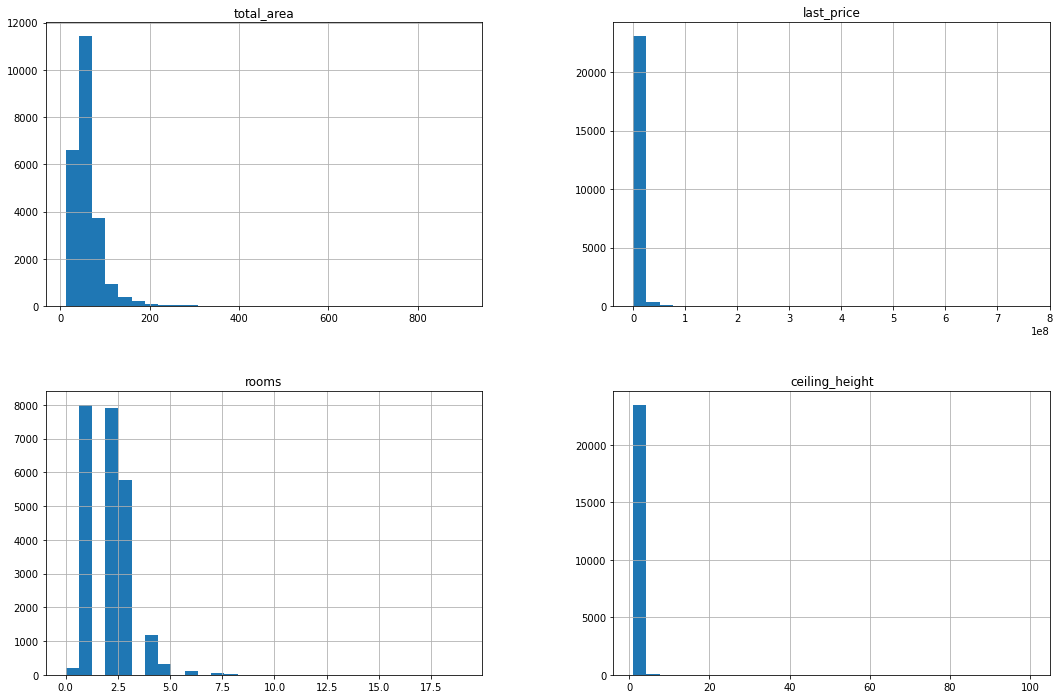

In [72]:
features = ['total_area', 'last_price', 'rooms', 'ceiling_height']
data[features].hist(figsize=(18,12), bins=30);

Общие графики оказались малоинформативными - на них оказывают сильное влияние уникальные или редкие значения и возможные выбросы. Попробуем вручную задать промежуток для построения для каждой из характеристик и посмотреть на более узкий набор данных.

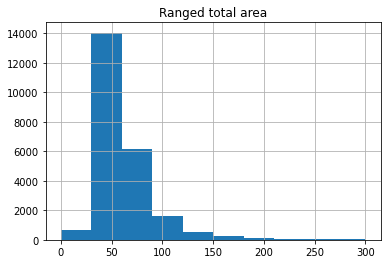

In [70]:
data.hist(column = 'total_area', bins = 10, range=(0,300))
plt.title('Ranged total area')
plt.show()

Относительно данного графика у нас уже есть возможность сделать некоторые выводы. Прежде всего, в выборке присутствует небольшая группа квартир с маленькой площадью - скорее всего, это квартиры студии. Наибольшее число квартир имеют площадь в диапазоне примерно 30-60 кв м. Квартир, имеющих площадь в диапазоне примерно 60-85 кв м, почти в два раза меньше. Квартир с большей площадью существенно меньше. Данные не имеют ярко выраженного распределения. 

На текущем этапе еще довольно сложно говорить о выбросах в данных. Для их выявления в рамках данной переменной понадобится провести дополнительное исследование.

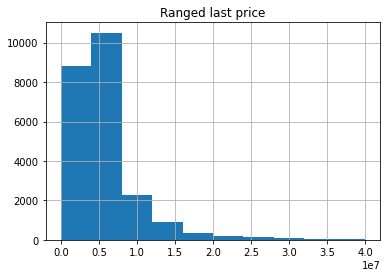

In [36]:
data.hist(column = 'last_price', range=(0,40000000))
plt.title('Ranged last price')
plt.show()

Подавляющее число квартир в рассматриваемой нами выборке стоят до 7 500 000. Число квартир с более высокой стоимостью значительно меньше - причем при дальнейшем увеличении стоимости уменьшается число таких квартир. 

Наличие довольно таки большого числа относительно недорогого жилья (до 5 000 000) может быть обусловлено, прежде всего, довольно обширным кругом локаций, откуда собирались объявления о продаже. Ведь, зачастую, не в городах цены на релевантное жилье несколько ниже по сравнению с городом.

Относительно наличия квартир с довольно высокой стоимостью (30 000 000 и выше) всё довольно неоднозначно. С одной стороны, эти квартиры могут рассматриваться как выбросы, обусловленные мошеннической деятельностью. С другой, квартиры в центре Санкт-Петербурга действительно на порядок дороже квартир в других районах города, а значит такие цены допустимы. В таком случае, по текущему анализу довольно сложно сказать, какие наблюдения можно рассматривать как выбросы, а значит нам будет необходимо провести дополнительную работу в будущем. 

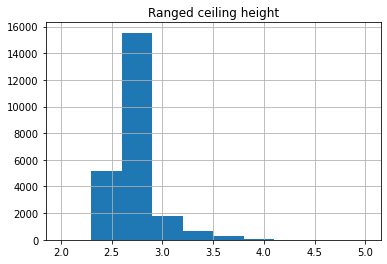

In [37]:
data.hist(column= 'ceiling_height', range=(2, 5))
plt.title('Ranged ceiling height')
plt.show()

Большинство квартир в выборке имеют стандартную высоту потолков - в пределах 2.6-2.9 метров. Однако в выборке присутствуют квартиры с большей высотой потолков - вероятно, это двухэтажные квартиры, которые набирают сильную популярность в последнее время и особенно распространены в Санкт-Петербурге. Их высота несколько больше высоты классических квартир, но не существенно. 

Также хотелось бы отметить, что, несмотря на то, что по исходному заданию нам было сказано, что в выборке присутсвуют квартиры, мы не можем с точностью сказать, учитывались ли продажи домов или нет. В таком случае можно предположить, что квартиры с восотой потолков порядка 5 м тоже являются допустимыми - это средняя выличина для двухэтадного дома. Все остальные значения мы с уверенностью можем назвать выбросами и после исключить из дальнейшего анализа. 

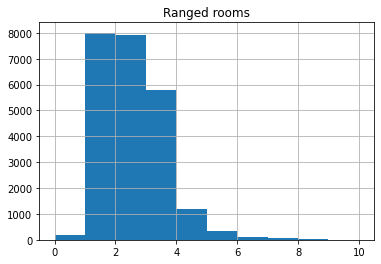

In [38]:
data.hist(column= 'rooms', range = (0, 10))
plt.title('Ranged rooms')
plt.show()

Наконец, рассмотрим **количество комнат** в квартирах из объявлений. Большинство квартир имеют до 4 комнат включительно. Число квартир с 5 и более комнатами существенно сокращается. Также, в выборке присутсвуют квартиры с нулевым числом комнат, что довльно таки странно. Возможно, такое обозначение использовали люди для квартир-студий (несмотря на то, что в классчических базах такие квартиры все-таки числятся как однокомнатные). Больше вопросов вызывают квартиры, в которых число комнат превышает 5, т.е. 6 и больше. Вполне вероятно, что это мошеннические объявления, ведь в реальной практике такие квартиры обычно не встречаются. Значит, такие наблюдения также будет необходимо исключить при дальнейшем анализе.

## Анализ длительности продаж

Теперь изучим **период времени, в течении которого публиковалось объявление** о продаже квартиры. Начнем с постройки гистограммы, а также рассчета среднего и медианны.

<AxesSubplot:>

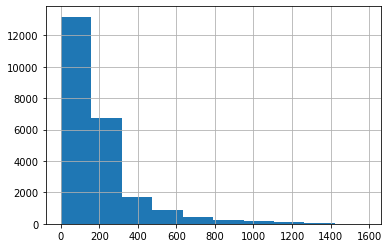

In [39]:
data['days_exposition'].hist()

In [40]:
data['days_exposition'].describe()

count    23565.000000
mean       180.743518
std        204.424037
min          1.000000
25%         45.000000
50%        124.000000
75%        198.000000
max       1580.000000
Name: days_exposition, dtype: float64

<AxesSubplot:>

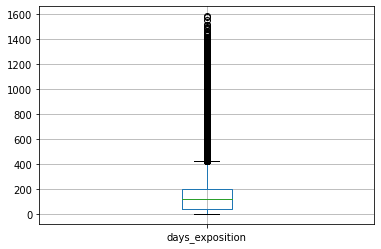

In [41]:
data.boxplot(column='days_exposition')

Что можно сказать относительно длительности продажи квартир? Прежде всего, отметим довольно очевидный фактор - зачастую с ростом продолжительности публикации снижается число самих публикаций. Большинство квартир имеют длительность публикации до порядка 200 дней. Число квартир, с длительностью публикации до порядка 300 дней, почти в два раза меньше. Дальше с увеличеснием длительности число объявлений существенно уменьшается.

Теперь поговрим немного об общей скорости продажи квартиры. Согласно полученным результатам, можно предположить, что продажи, которые были осуществены за меньше чем 45 дней, можно считать быстрыми. В то же время, продажи, чья длительность превышает около полутора лет, проходили довольно долго.

## Выявление и устранение выбивающихся наблюдений

Теперь перейдем к одному из важнейших этапов первичного анализа - **выявлению и устранению редких и выбивающихся наблюдений**. 

Нами было разработано две стратегии по нахождения выбросов. По первой стратегии мы рассматривали вырхние границы "усов" цены за квадратный метр для каждого типа локации, и ограничивали исходную выборку по данному числу. Однако, пободная стратегия привела к тому, что в выборке не осталось наблюдений, так что от нее пришлось отказаться. По второй стратегии мы провели анализ на выбросы для основных характеристик, которые использовались при дальнейшем анализе. По итогу мы остановились на данной стратегии.

Также отметим, что анализ в данном пункте будет проводиться исключительно для наиболее значимых переменных - тех, что уже участвовали или еще будут участвовать в дальнейшем анализе. Это позволит не потерять так много данных, как при анализе всех предоставленных переменных. Также, хотелось бы отдельно отметить переменные, которые также не будут рассматриваться в данном пункте, несмотря на будущую значимость - это те переменные, которые связаны с датой публикации объявления. Данные характеристики не нужндяются в подобном анализе, поскольку перечисленные в выборке даты соответствуют реальности.

Начем с анализа переменной, отвечающей за **общую площадь** в квартире. Визульный анализ данной характеристики не помог выявить порог отсечения для выбивающихся значений. С идейной или логической точки зрения так же сложно подобрать данный порог. В таком случае рассчитаем основные квартили и оценим размах "усов".

In [42]:
data['total_area'].quantile([0.25,0.5,0.75])

0.25    40.0
0.50    52.0
0.75    69.7
Name: total_area, dtype: float64

In [43]:
print(f'Размах "усов" ограничен значениями в {40-29.7*1.5} и {69.7+29.7*1.5}.')

Размах "усов" ограничен значениями в -4.549999999999997 и 114.25.


<AxesSubplot:>

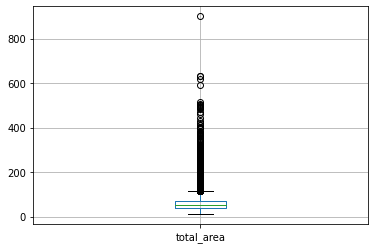

In [44]:
data.boxplot(column='total_area')

Согласно диаграмме "ящик с усами", все квартиры, общая площадь которых первышает 114 кв м можно считать выбросами. Однако не будем спешить с выводыми и вспомним часть пердыдущего анализа. При анализе количества комнат нами было принято решение оставить объявления, в которых число комнат не превышает 5. Для такого числа комнат площадь в 114 кв м довольно таки мала. Это значит, что установив подобный порог отсечения мы потеряем часть значимых объявлений. В таком случае логичнее подобрать порог в зависимости от максимального числа комнат. Рассчитаем среднюю площадь для квартир с 5 комнатами.

In [45]:
data.loc[data['rooms']==5]['total_area'].mean()

161.5172

Данное число куда ближе к реальности, а значит мы можем выбрать его в качестве порога для отсечения.

In [46]:
data_new = data[data['total_area']<161]

Теперь рассмотрим переменную, отвечающую за **итоговую стоимость**. Повторим предыдущий анализ и для данной характеристики. 

In [47]:
data_new['last_price'].quantile([0.25,0.5,0.75])

0.25    3400000.0
0.50    4600000.0
0.75    6596500.0
Name: last_price, dtype: float64

<AxesSubplot:>

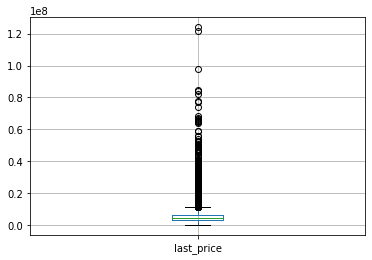

In [48]:
data_new.boxplot(column='last_price')

Верхняя граница "усов" составляет 11 391 250, а максимальное значение - около 120 000 000. Остановиться на пороге для отсечения на верхнем "усе"допустимо, но в таком случае мы исключим из выборки квартиры премиум класса, которые определенно стоят выше данной суммы. В качестве суммы для отсечения возьмем 60 000 000 - именно после данного числа происходит первый разрыв, после которого наблюдений становится существенно меньше. Проведем отсечение.

In [49]:
data_new = data_new[data_new['last_price']<60000000]

Теперь проанализируем **число комнат**.

In [50]:
data_new['rooms'].quantile([0.25,0.5,0.75])

0.25    1.0
0.50    2.0
0.75    3.0
Name: rooms, dtype: float64

<AxesSubplot:>

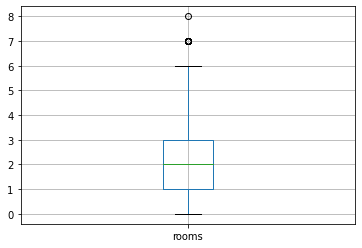

In [51]:
data_new.boxplot(column='rooms')

Согласно данной диаграмме, **число комнат**, превышающее значение 6, является выбросом. Это является довольно таки логичным результатом, однако для дальнейшего анализа мы все-таки оставим квартиры с максимум 5 комнатами. Поскольку мы до этого довольно существенно ограничили **общую площадь** и **итоговую цену** под наши ограничения могут попасть мошеннические объявления с 6 комнатами. 

Вновь ограничим наши данные по описанному выше принципу. 

In [52]:
data_new = data_new[data_new['rooms']<6]

Обратимся к переменной, отвечающей за **высоту потолков**. Рассмотрим диаграмму "ящик с усами" для данной характеристики.

<AxesSubplot:>

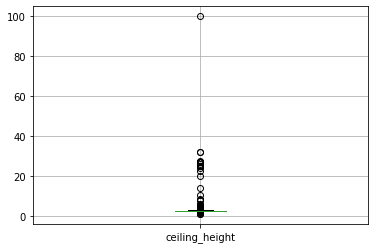

In [53]:
data_new.boxplot(column='ceiling_height')

Как можно заметить, в выборке сохранились наблюдения с аномальной высотой потолков. По проделанному в предыдущем пункте анализу мы решили оставить только те наблюдения, где высота потолка не превышает 5 метров.

In [54]:
data_new = data_new[data_new['ceiling_height']<=5]

Наконец, рассмотрим переменную, отвечающую за **длительность публикации объявления**. Повторим часть предыдущего анализа для новой выборки. 

<AxesSubplot:>

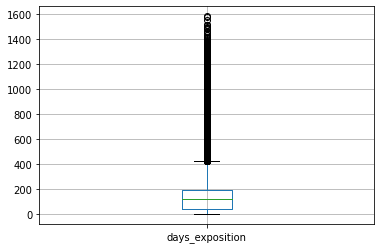

In [55]:
data_new.boxplot(column='days_exposition')

В качестве верхней границе для отсичения выбросов возьмем значение равное 400 дням. Всё, что находится выше, будем считать чрезмерно затяжной продажей, которую можно прировнять к выбросу.

In [56]:
data_new = data_new[data_new['days_exposition']<400]

Кратко рассмотрим полученную нами выборку.

In [57]:
data_new.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20505 entries, 0 to 23698
Data columns (total 31 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   total_images            20505 non-null  int64         
 1   last_price              20505 non-null  float64       
 2   total_area              20505 non-null  float64       
 3   first_day_exposition    20505 non-null  datetime64[ns]
 4   rooms                   20505 non-null  int64         
 5   ceiling_height          20505 non-null  float64       
 6   floors_total            20505 non-null  int64         
 7   living_area             18824 non-null  float64       
 8   floor                   20505 non-null  int64         
 9   is_apartment            20505 non-null  bool          
 10  studio                  20505 non-null  bool          
 11  open_plan               20505 non-null  bool          
 12  kitchen_area            18511 non-null  float6

Как можно заметить, в ходе работы над выбросами нами были исключены порядка 3 000 наблюдений. Данное значение не столь велико благодаря тому, что мы проанализировали исключительно наиболее значимые характеристики. Вполне возможно, что, проведя полный анализ всех имеющихся переменных, число удаленных налюдений сократилось бы на большую величину.

In [58]:
# Код ревьюера
len(data_new)/len(data)

0.8701464035646085

## Оценка влияния факторов на стоимость квартиры

Перейдем в анализу влияния имеющихся факторов на стоимость квартиры? Изучим, зависит ли цена от площади, числа комнат, удалённости от центра. При дальнейшем анализе не забудем учесть то, что есть отрицательные значения для cityCenters_nearest и их нужно исключить из графика.

Корреляция между last_price и total_area: 0.7345532426731533
Корреляция между last_price и rooms: 0.4269859412111845
Корреляция между last_price и cityCenters_nearest: -0.006430147784607411


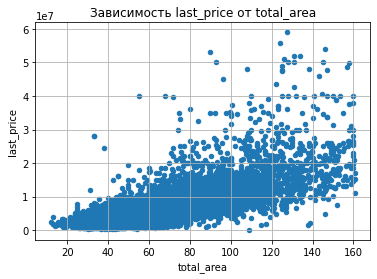

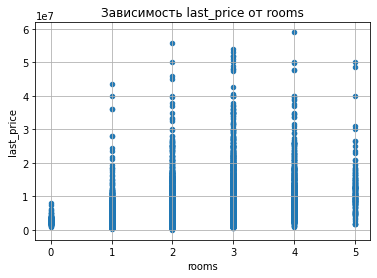

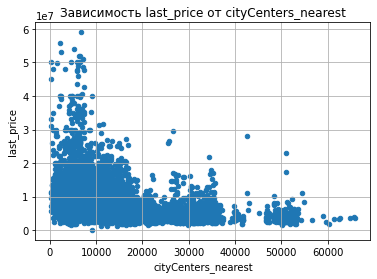

In [59]:
for name in ['total_area', 'rooms', 'cityCenters_nearest']:
    if name == 'cityCenters_nearest':
        data_new.query('cityCenters_nearest > 0').plot(x=name, y='last_price', kind='scatter', 
                    title=f'Зависимость last_price от {name}', grid=True)
    else: 
        data_new.plot(x=name, y='last_price', kind='scatter', 
                    title=f'Зависимость last_price от {name}', grid=True)
    print(f'Корреляция между last_price и {name}:', data_new['last_price'].corr(data[name]))

Какие выводы можно сделать относительно полученных графиков? Прежде всего, можно заметить наличие некоторой довольно сильной положительной линейной взаимосвязи между **общей площадью** квартиры и **итоговой ценой**. Полученный результат вполне соответствует здравому смыслу - чем больше площадь, тем больше удобство от проживания в такой квартире, и тем большую сумму придется отдать за квартиру. Относительно связи между **числом комнат** и **итоговой ценой** сложно сделать однозначный вывод ориентируясь только на график. Согласно рассчетному значению коэффициента корреляции Пирсона между данными параметрами есть средняя положиетльная взаимосвязь. На мой взгляд, однако, более вероятно, что связь между ними не линейная, а квадратичная с пиком у 3 комнат в квартире. Наконец, **итоговая цена** и **расстояние до ближайшего города** имеют отрицательную связь, что также соответствует здравому смыслу - чем ближе квартира к городу, тем меньше времени придется тратить на дорогу, а значит тем выше может быть цена за такую квартиру. Однако связь между этими характеристиками определенно не линейная - об этом говорит и коэффициент корреляции Пирсона, и сам график. Вполне вероятно, что связь между этими характеристиками дробно-линейная.

Также изучим зависимость цены от того, **на каком этаже расположена квартира**: первом, последнем или другом. 

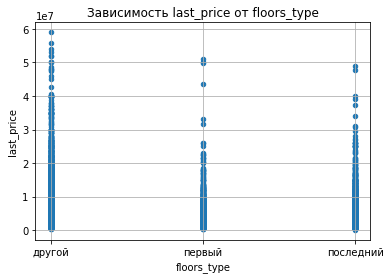

In [60]:
data_new.plot(x='floors_type', y='last_price', kind='scatter', grid=True, title='Зависимость last_price от floors_type')
plt.show()

Наименьшей ценой обладают квартиры на первых этажах. Это довльно таки логично, ведь шум на первом этаже существенно выше по сравнению с более высокими этажами, а значит необходимо назначать меньшую цену для продажи, чтобы такую квартиру купили. Что интересно, цена за квартиру на последнем этаже в среднем не превышает цену на всех остальных этажах - верятно, в последние несколько лет тренд на некоторую переплату за отсутвие соседец сверху сошел на нет, и цена квартир на верхних этажах примерно поравнялась с остальными этажами.

Наконец, изучим зависимость **итоговой цены** от даты размещения: дня недели, месяца и года.

Корреляция между last_price и year: 0.0011664526355743866
Корреляция между last_price и month: -0.007703964433950869
Корреляция между last_price и weekday: -0.013390439747261038


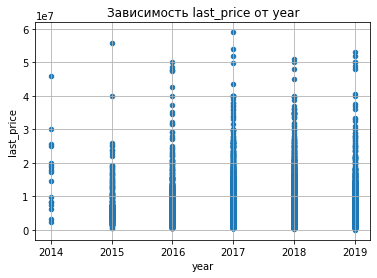

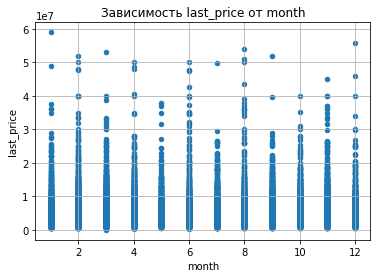

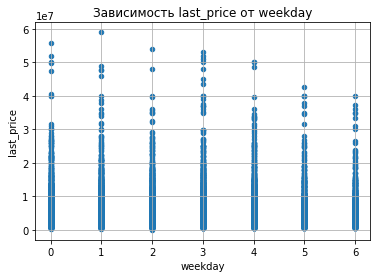

In [61]:
for name in ['year', 'month', 'weekday']:
    data_new.plot(x=name, y='last_price', kind='scatter', grid=True, title=f'Зависимость last_price от {name}') 
    print(f'Корреляция между last_price и {name}:', data_new['last_price'].corr(data[name]))

Что можно сказать по полученным графикам? В 2016 году случился скачек в ценах на квартиры, псоле коорого можно наблюдать небольшое дальнейшее снижение цен. Относительно зависимости **итоговой цены** от **месяца** и **дня недели публикации** довольно сложно выявить однозначную тенденцию. Оба графика довольно волнообразны, т.е. значения от в некой мере колеблются от периода к периоду. 

## Выявление локаций с наибольшим числом продаж

Для анализа в данном пункте выберем 10 населённых пунктов с наибольшим числом объявлений. Посчитаем для них среднюю цену квадратного метра, после чего выделим населённые пункты с самой высокой и низкой стоимостью жилья.

In [62]:
piv_table = data_new.pivot_table(index='new_location', values = 'last_price', 
                     aggfunc=['count', 'mean'])

In [63]:
piv_table.columns = ['count', 'mean']
piv_table.sort_values(by='count', ascending = False).head(10)

,count,mean
new_location,,
Санкт-Петербург,13454,6.758881e+06
Мурино,537,3.650397e+06
Кудрово,423,4.383472e+06
Шушары,400,4.108564e+06
Всеволожск,349,3.829109e+06
Пушкин,323,6.017339e+06
Колпино,309,3.857289e+06
Парголово,295,4.497157e+06
Гатчина,269,3.471280e+06


Средняя цена для попавших в подвыборку локаций составляет 3 891 700. Если разделить данные локации на две группы относительно того, превышает ли средняя цена в данной локации среднюю цену по группе, то получим следующий результат:
* Группа меньше среднего: Выборг, Гатчина, Мурино, Всеволожск и Колпино
* Группа выше среднего: Кудрово, Шушары, Парголово, Пушкин и Санкт-Петербург.

## Анализ квартир в Санкт-Петербурге

Наконец, изучим предложение квартир: для каждой квартиры есть информация о расстоянии до центра. Выделим квартиры в Санкт-Петербурге.

Основная задача данного пункта - выяснить, какая область входит в центр. Для этого создадим столбец с расстоянием до центра в километрах: округлим до целых значений.

In [64]:
data_spb = data_new.query('new_location == "Санкт-Петербург" and cityCenters_nearest > 0')
data_spb['cityCenter_km'] = round(data_spb['cityCenters_nearest']/1000)

/tmp/ipykernel_99/4261861884.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_spb['cityCenter_km'] = round(data_spb['cityCenters_nearest']/1000)


Посчитаем среднюю цену для каждого километра. По полученным рассчетам построим график, который будет показывать, как цена зависит от удалённости от центра. Определим границу, где график сильно меняется, — это и будет центральная зона.

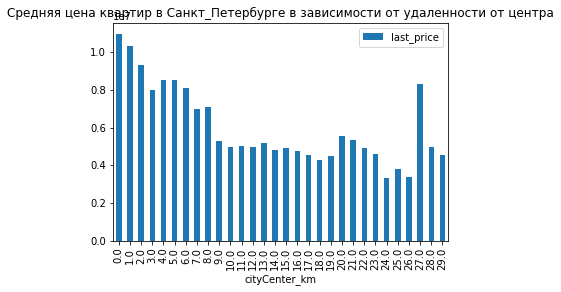

In [65]:
data_spb.pivot_table(index='cityCenter_km', values='last_price', aggfunc = 'median').plot(kind='bar')
plt.title('Средняя цена квартир в Санкт_Петербурге в зависимости от удаленности от центра')
plt.show()

Как можно заметить по полученному графику, первый существенный скачок происходит между 8 и 9 киллометрами - в таком случае для разделения центрального и нецентрального Санкт-Петербурга используем именно 9 километров. 

## Анализ квартир в центре Санкт-Петербурга

На основе результатов из предыдущего пункта выделим сегмент квартир в центре. Проанализируем эту территорию и изучим следующие параметры: площадь, цена, число комнат, высота потолков.

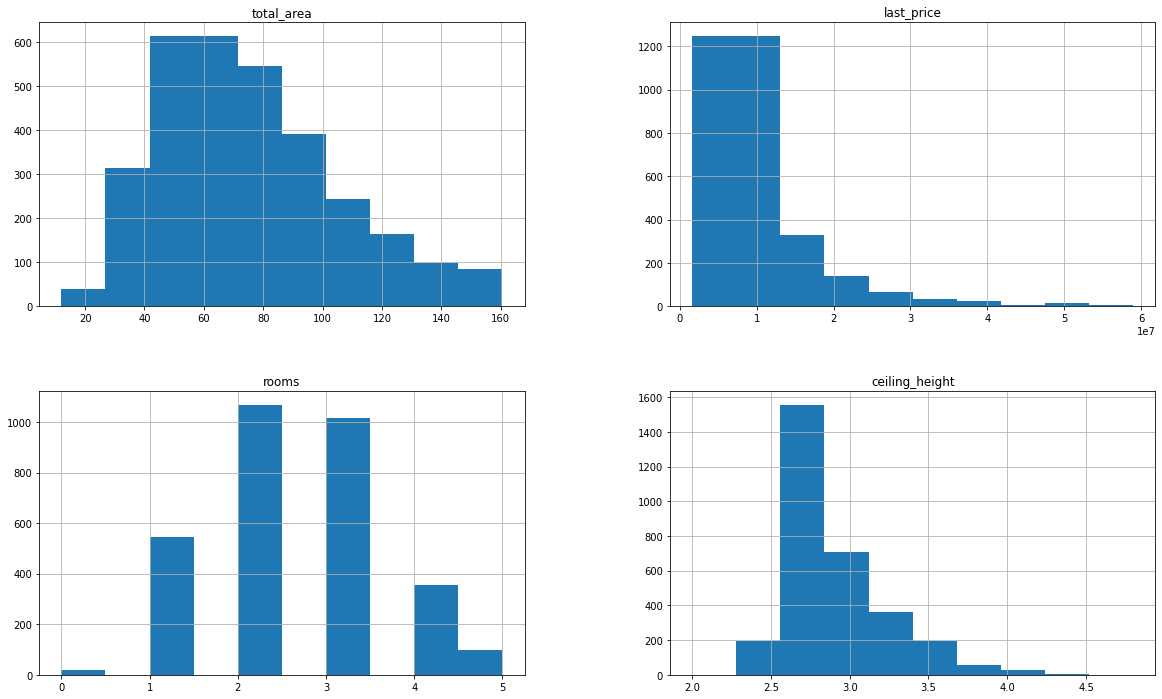

In [66]:
data_spb_center = data_spb.query('cityCenter_km < 9')

data_spb_center[features].hist(figsize=(20,12));

 Отличаются ли они от общих выводов по всей базе?
    
Пик у характеристики, отвечающей за **общую площадь** не сильно разнится по сравнению с общей выборкой - он достигается на диапозоне от 40 до 70 кв м. Между тем, снижение площади после пика теперь стало куда более плавным по сравнению с исходным набором данных.

Весьма сильно разнятся графики **итоговой цены**. Теперь пик у переменной наступает при большей цене - с промежутка в 2 500 000 - 7 500 000 произошел скачек до промежутка 2 500 000 - 17 000 000. После пика, как и на предыдущем графике, происходит резкое сокращение наблюдений с большей ценой. 

Слегка изменилось распределение **числа комнат**. В квартирах в центре Санкт-Петербурга пик достигается на двух комнатах (против 1 комнаты в исходной выборке). Число квартир с одной комнатой значительно сократилось, в то время как число квартир с 3 комнатами, напротив, возрасло по сравнению с предыдущими результатами. Как и до этого, количество квартир с большим числом комнат незначительно. 

Наконец, рассмотрим **высоту потолков**. В целом, получившийся график не сильно разнится с предыдущим результатом. Пик также достигается при 2.7-2.8 метрах, а после 3 метров количество наблюдений значительно соркащается.

В целом, нельзя сделать однозначный вывод о похожести выводов по центру Санкт-Петербурга и исходной выборкой - какие-то переменные оказались похожи, в то время как дургие - нет.

Также выделим факторы, которые влияют на стоимость квартиры (число комнат, этаж, удалённость от центра, дата размещения объявления) и сделайем по ним выводы.

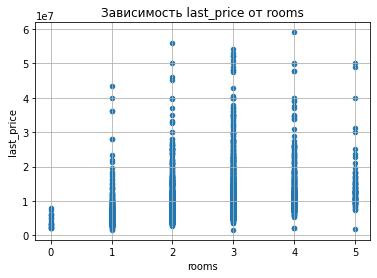

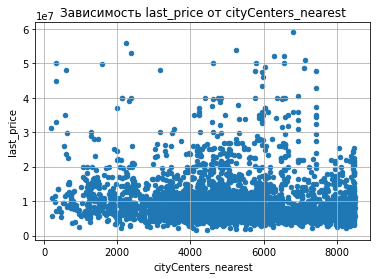

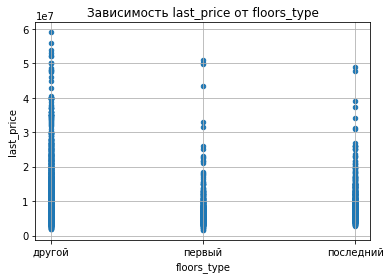

In [67]:
for name in ['rooms', 'cityCenters_nearest', 'floors_type']:
    data_spb_center.plot(x=name, y='last_price', kind='scatter', grid=True, title=f'Зависимость last_price от {name}') 

Сделаем промежуточные выводы.

Как и до этого, **число комнат** нелинейно влияет на **цену** - до трех комнат наблюдается рост цены, а после - ее снижение. Довольна интересна ситуация с **расстоянием до центра** - теперь стало затруднительно выявить однозначную зависимость между данной характеристикой и **итоговой ценой**. Вероятно, это вина максимального расстояния до центра - в данном диапозоне цена не сильно разнится от расстояния, посольку это в любом случае центр города. Также довольно интересные результаты получились по зависимости **итоговой цены** от **типа этажа**. Как и до этого, наибольшей средней ценой обладают квартиры ни с первого и ни с последнего этажа - категория другие. Но если раньше квартиры на последнем этаже были ближе к категории *другие*, то теперь они ближе к категории *первый этаж*. Между тем квартиры на первом этаже все так же в среднем дешевле квартир на других этажах. 

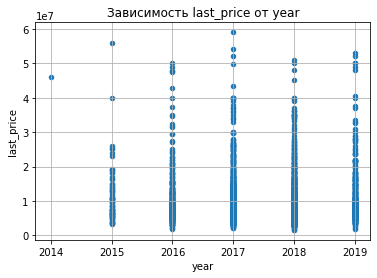

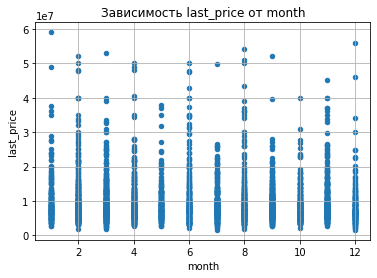

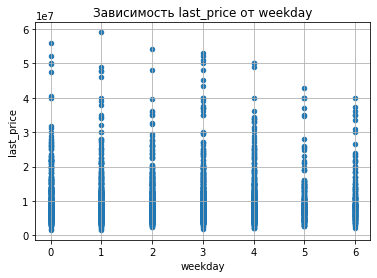

In [68]:
for name in ['year', 'month', 'weekday']:
    data_spb_center.plot(x=name, y='last_price', kind='scatter', grid=True, title=f'Зависимость last_price от {name}') 

Какие выводы мы можем сделать по времени размещения объявления?

В данных по центру Санкт-Петербурга все также наблюдается скачек в цене в 2016 году, после чего цена немного снижается. Поскольку выборка охватывает малый временой промежуток, довольно сложно определить, линейна ли связь. 

Зависимость **цены** от **месяца** и **дня недели публикации** как и до этого довольно неоднозначна - данные слегка колеблются, но в среднем остаются на одной величине. 

# Итоговые выводы

В ходе работы мы выполнили несколько важных задачи:

* Обработали исходные данные: выявили и устранили пропуски, преобразовали часть данных, а также избавились от части выбросов
* Изучили связь между некоторыми характеристиками квартир и итоговой ценой
* Сравнили влияние выбраных характеристик в зависимости от расположения квартиры

Какие же выводы были получены по итогу исследовательской части проекта?
1. На общей выборке:
    1. Общая площадь оказывает положительное влияние на цену - с ростом площади растет и цена
    2. Число комнат влияет на цену квадратично - до трех комнат цена растет, после - уменьшается
    3. Расстояние до ближайшего города влияет на цену отрицательно - с ростом расстояния снижается цена
    4. Год, месяц и день недели не оказывают существенного линейного влияния на цену 
2. К городам с наибольшим числом объявлений относятся: Выборг, Гатчина, Мурино, Всеволожск, Колпино, Кудрово, Шушары, Парголово, Пушкин и Санкт-Петербург.
3. В Санкт-Петербурге расположение квартир можно отнести к центральному, если расстояние до центра не превышает 9 км.
4. На выборке центрального района в Санкт-Петербурге:
    1. Число комнат нелинейно влияет на цену - до трех комнат наблюдается рост цены, а после - ее снижение
    2. Влияние расстояния до центра на цену стало менее очевидно - оно либо слабое, либо не линейное
    3. Наибольшей средней ценой обладают квартиры ни с первого и ни с последнего этажа - категория другие. Квартиры на первом этаже все так же в среднем дешевле квартир на других этажах. 
    4. Год, месяц и день недели не оказывают существенного линейного влияния на цену 